# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
# Import Basic Libraries
import numpy as np
import pandas as pd
import os

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for Statistical Analysis
import scipy.stats as stats

# Set Options for Tabular Output
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

# Import Libraries for Train-Test split, Scaling,Label encoder and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
cancerdf = pd.read_csv('breast-cancer-wisconsin.data.txt', sep = ",", names = ['Sample Code Number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])
cancerdf.head(10)

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
# Id columns is to identify rows hence can be skipped in analysis
cdf = cancerdf.drop('Sample Code Number', axis = 1)
cdf.head(5)

  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
# Printing the datatypes of each column
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [5]:
# Shape of the Dataset
print("Number of Rows:",cdf.shape[0],"\n")
print("Number of Columns:",cdf.shape[1])

Number of Rows: 699 

Number of Columns: 10


In [6]:
# Descriptive Analysis
round(cdf.describe().transpose(),3)

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,4.418,2.816,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134,3.051,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207,2.972,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.807,2.855,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216,2.214,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.438,2.438,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.867,3.054,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589,1.715,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.690,0.951,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


Data Pre - Processing

In [7]:
# 1 Cleaning any leading/trailing whitespace in the column header
cdf.columns = [x.strip() for x in cdf.columns]
cdf.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

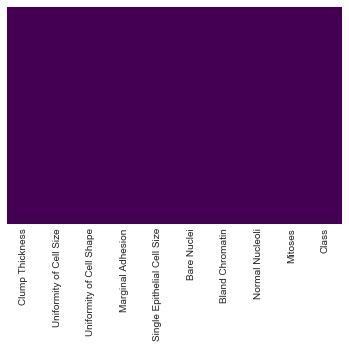

In [9]:
# 2 Missing Value through data visualization
sns.heatmap(cdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column
cdf = cdf.replace('?',np.nan) #Converting to null value
# Get count of rows having ?
print("Count of rows with '?':",cdf.isna().any().count())

Count of rows with '?': 10


In [11]:
# 10 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Imputing with mean
cdf['Bare Nuclei'] = cdf['Bare Nuclei'].astype(float, errors = 'ignore') #Converting into float
cdf['Bare Nuclei'] = cdf['Bare Nuclei'].fillna(cdf['Bare Nuclei'].mean()).astype(float)

# Rechecking
cdf.isna().any()

Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


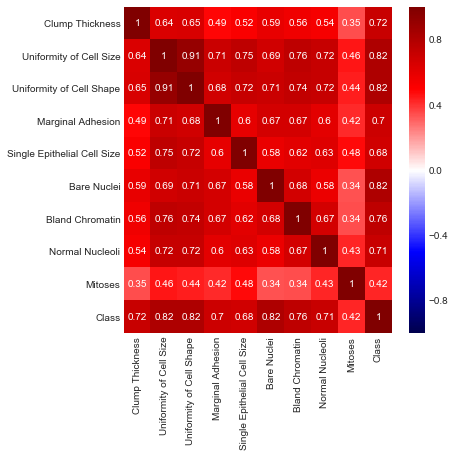

In [12]:
# Check for correlation of variable

fig, ax = plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(cdf.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

In [13]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

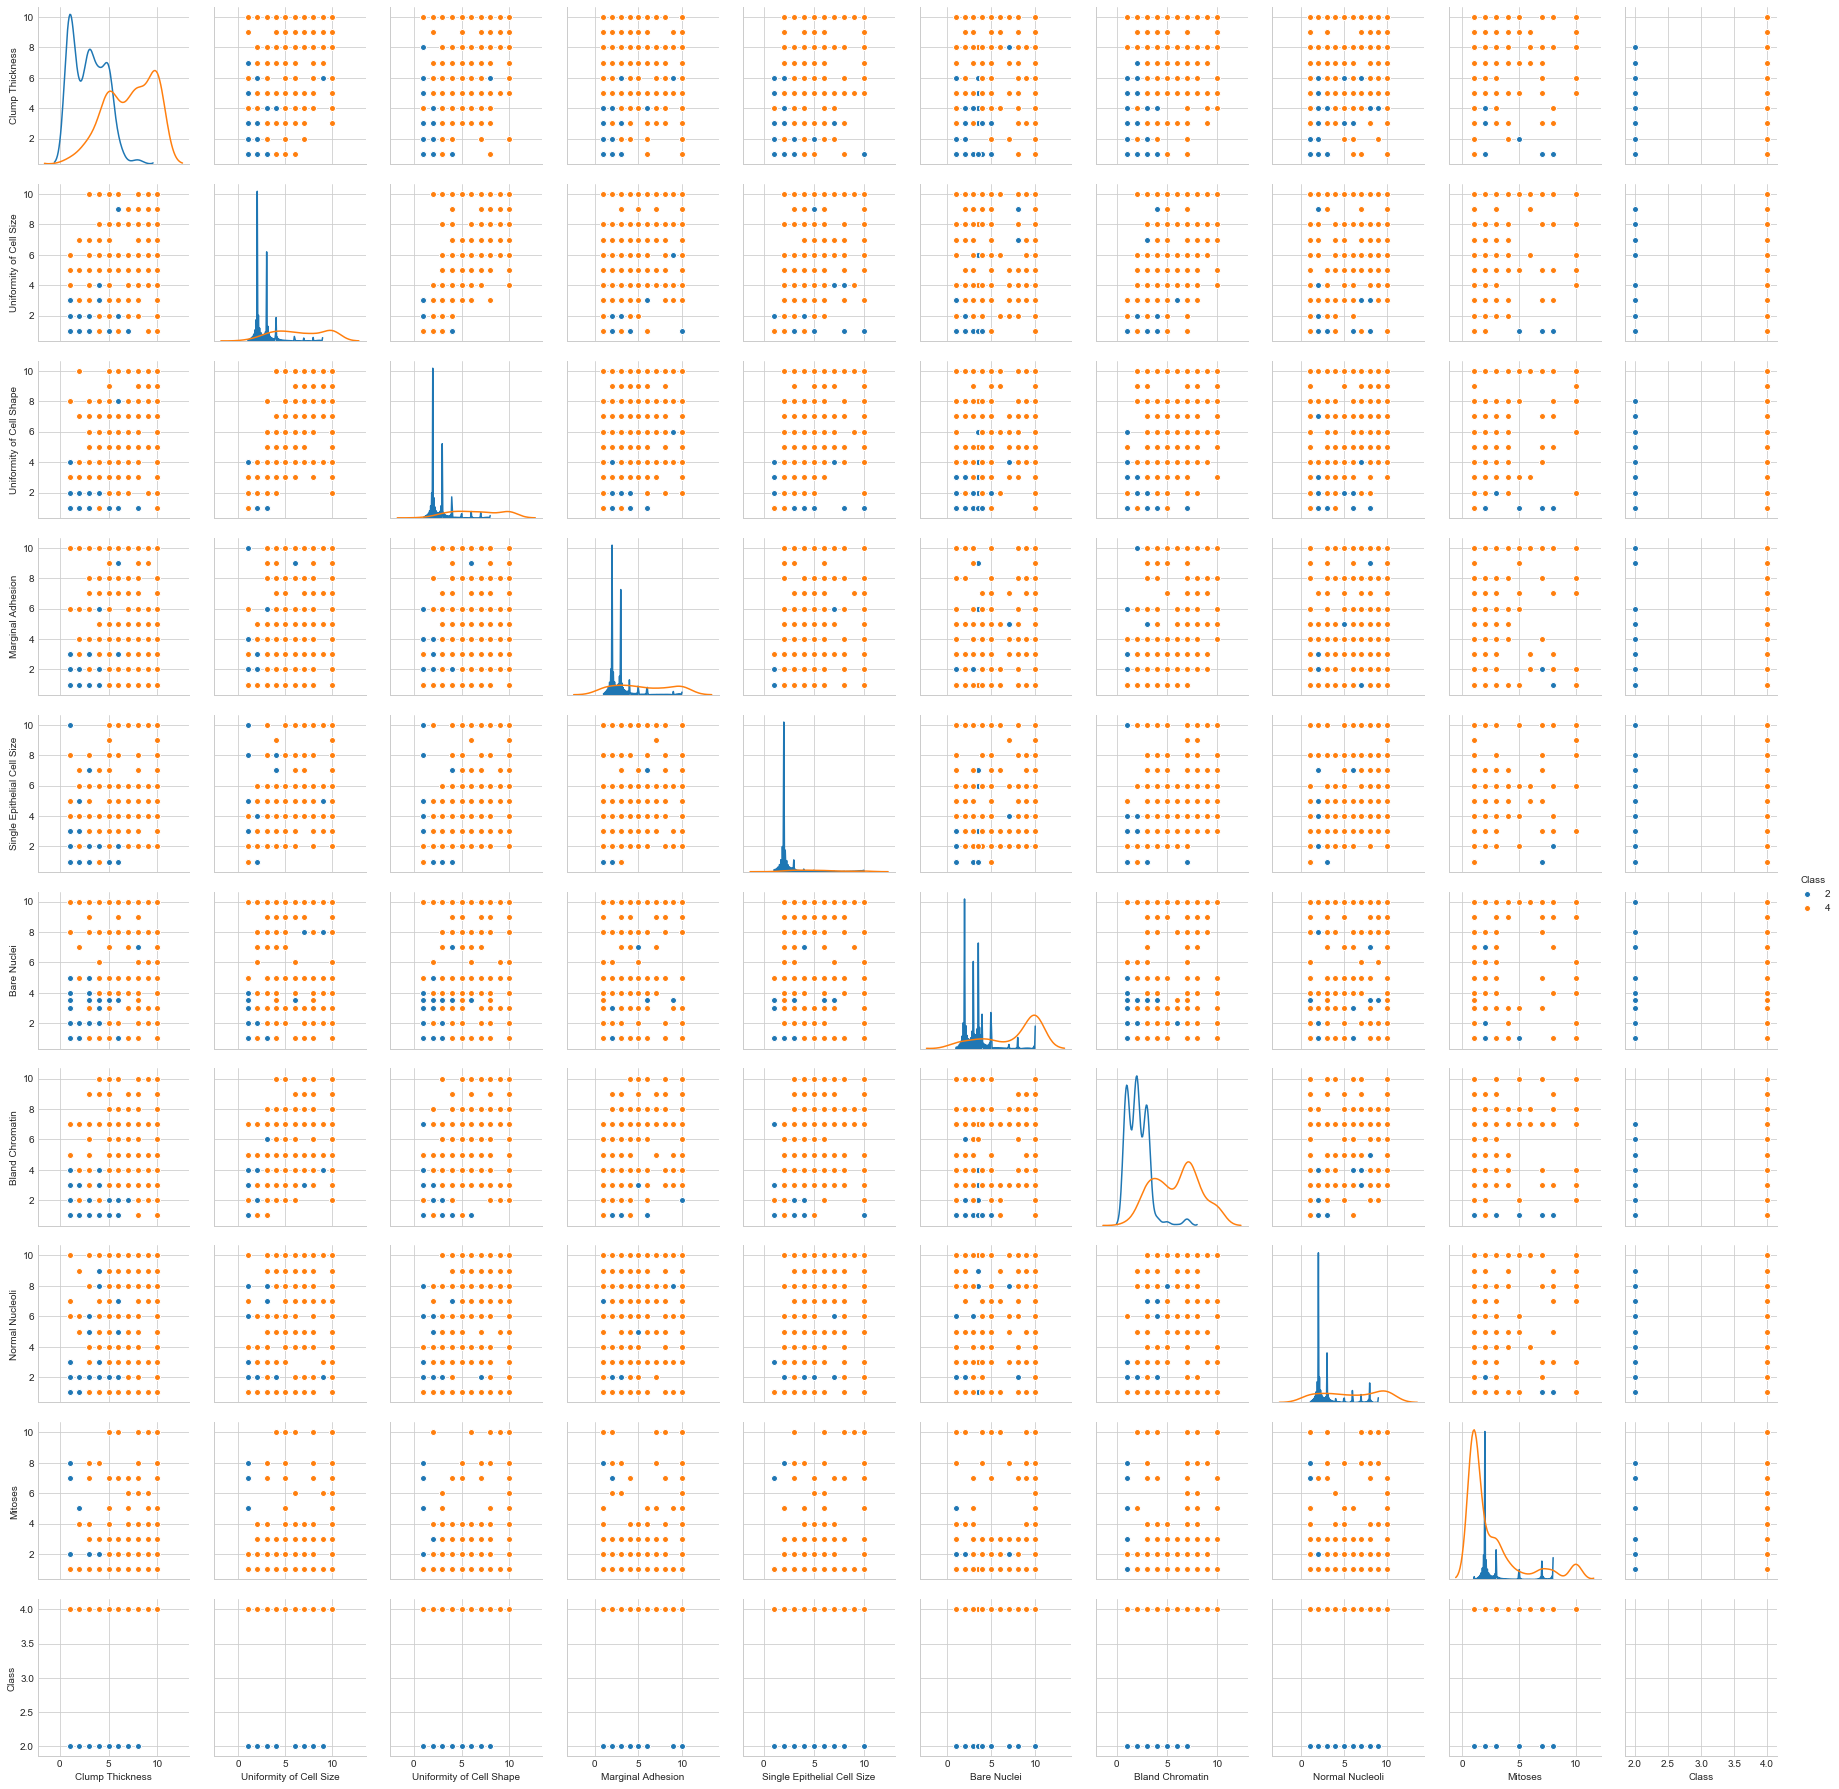

In [14]:
#Let us check for pair plots
sns.pairplot(cdf,hue='Class', diag_kind = 'kde')

In [15]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

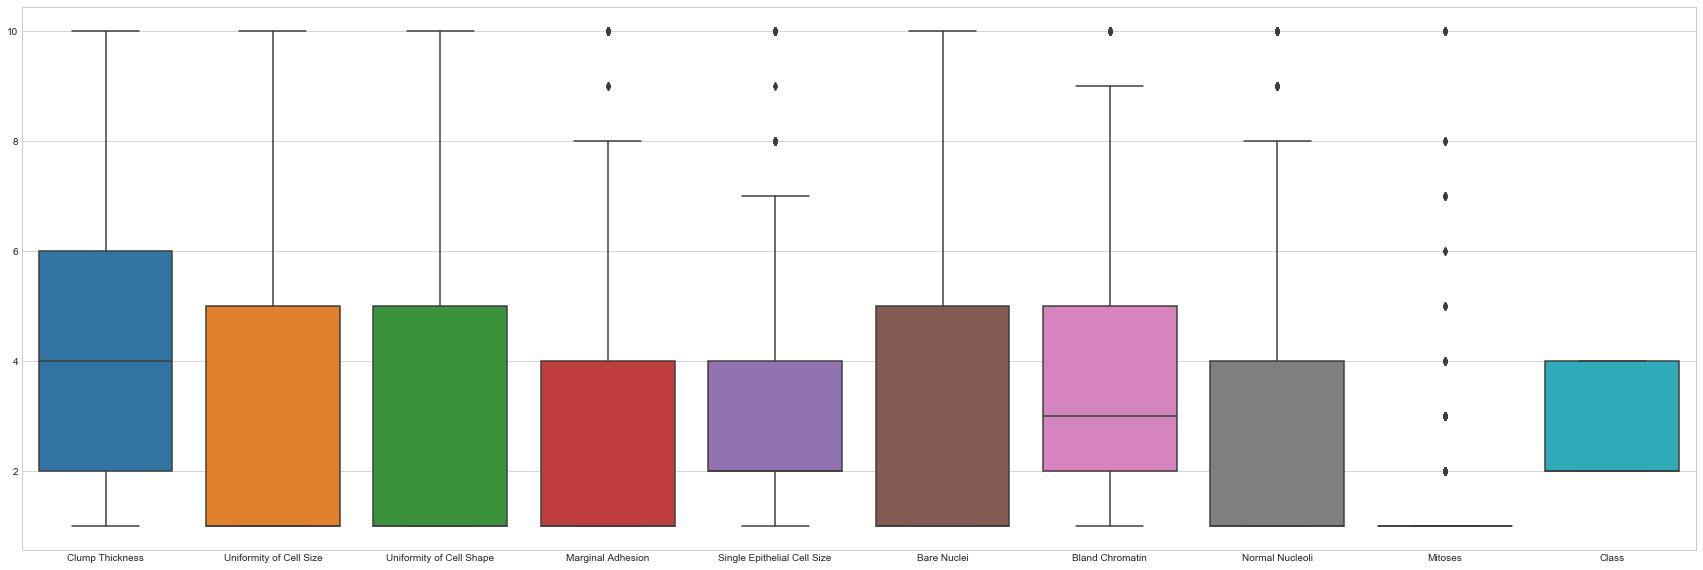

In [16]:
# BOXPLOT to see if their are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = cdf)

In [17]:
# Calculation of first quantile (Q1), Third Quantile (Q3), and Inter Quantile Range
Q1 = cdf.quantile(0.25)
Q3 = cdf.quantile(0.75)
IQR = Q3 - Q1
l_bound = Q1 - (1.5*IQR)
u_bound = Q3 + (1.5*IQR)
print("IQR for attributes in dataset:\n", round(IQR,2))

IQR for attributes in dataset:
 Clump Thickness                4.0
Uniformity of Cell Size        4.0
Uniformity of Cell Shape       4.0
Marginal Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Bland Chromatin                3.0
Normal Nucleoli                3.0
Mitoses                        0.0
Class                          2.0
dtype: float64


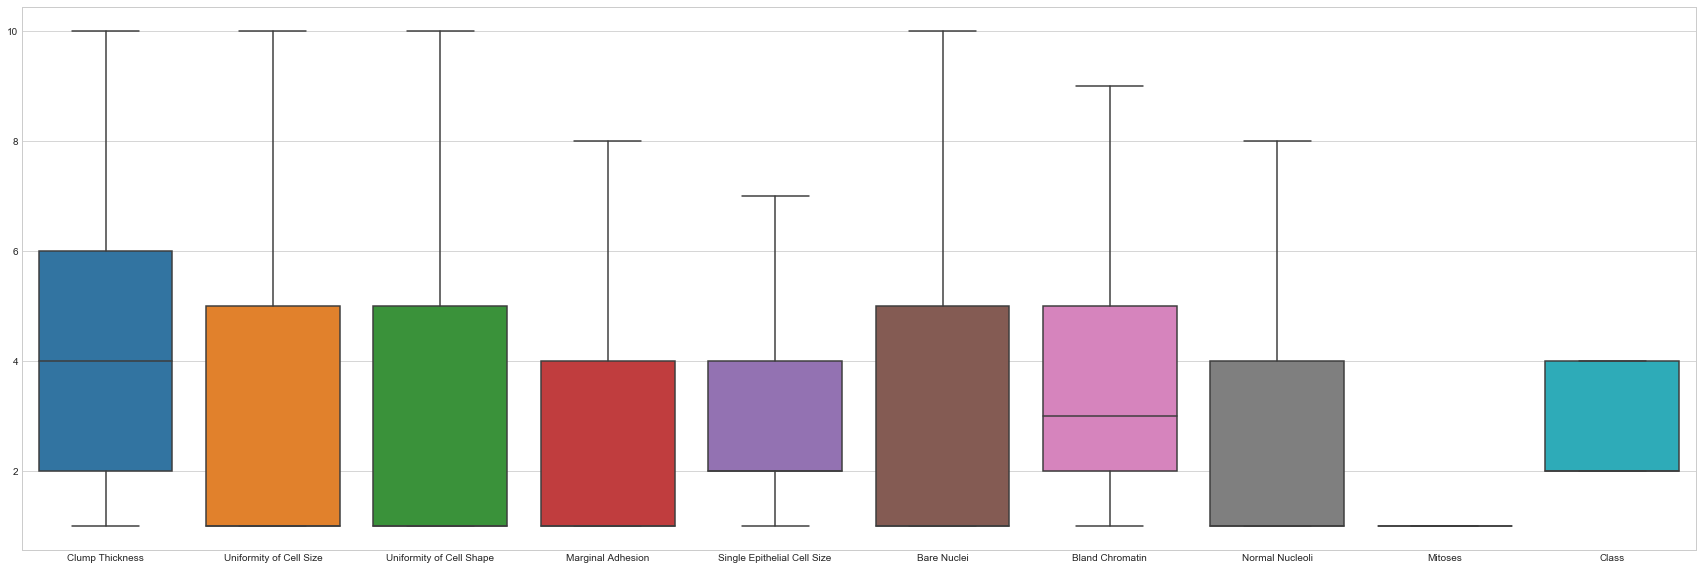

In [18]:
# Creating a new Workbook and keeping the original dataset for reference purpose
wb =cdf.copy(deep = True)

# Converting the outliers into nan and then imputing nan with max value
wb[(wb < l_bound) | (wb > u_bound)] = np.nan
wb = wb.fillna(wb.max()).astype(float)

# BOXPLOT to see if there are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = wb)

In [19]:
# We could see most of the outliers are now removed.

In [20]:
wb.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


# Q6 Create a covariance matrix for identifying Principal components

In [21]:
# PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
wb.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [23]:
# Step 1 - Create covariance matrix
X = wb[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']]
Y = wb[['Class']]

In [24]:
# Splitting in Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 10)

In [25]:
# Standardizing the data
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [26]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00179211 0.6325921  0.65157657 0.49415299 0.54074636 0.58603556
  0.5650964  0.53335627 0.        ]
 [0.6325921  1.00179211 0.90907327 0.72273984 0.77200712 0.6841925
  0.7632751  0.7064847  0.        ]
 [0.65157657 0.90907327 1.00179211 0.68634219 0.74736684 0.69785219
  0.74115388 0.70274197 0.        ]
 [0.49415299 0.72273984 0.68634219 1.00179211 0.65141942 0.65903639
  0.66904059 0.6291166  0.        ]
 [0.54074636 0.77200712 0.74736684 0.65141942 1.00179211 0.6189216
  0.66059161 0.67658277 0.        ]
 [0.58603556 0.6841925  0.69785219 0.65903639 0.6189216  1.00179211
  0.6893864  0.58236443 0.        ]
 [0.5650964  0.7632751  0.74115388 0.66904059 0.66059161 0.6893864
  1.00179211 0.67382917 0.        ]
 [0.53335627 0.7064847  0.70274197 0.6291166  0.67658277 0.58236443
  0.67382917 1.00179211 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [27]:
# Step 2- Get eigen values and eigen vector

e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 0.3080252   0.86708784  0.01758353  0.12874274 -0.19177023 -0.083247
   0.29746523 -0.06483699  0.        ]
 [ 0.38764432 -0.05065097  0.73544301  0.15378852  0.2956026   0.32732796
  -0.13881157 -0.26238498  0.        ]
 [ 0.38408368  0.03492785 -0.66435384  0.15979196  0.45910673  0.30533619
  -0.19320139 -0.20742305  0.        ]
 [ 0.34329176 -0.34044443 -0.07285814 -0.40480707 -0.08438853  0.04155825
   0.71087344 -0.28789186  0.        ]
 [ 0.35385148 -0.21750646 -0.05677909  0.33325909 -0.48836494  0.41732466
   0.04771086  0.54613008  0.        ]
 [ 0.34283902  0.13553417  0.06508943 -0.66182527  0.24924259 -0.09137952
  -0.21170102  0.55367244  0.        ]
 [ 0.35964846 -0.09446939 -0.06214256 -0.17373383 -0.54821695 -0.27556496
  -0.53675077 -0.40386149  0.        ]
 [ 0.34261695 -0.23209429  0.02859822  0.43716634  0.23828314 -0.72974169
   0.1199288   0.18201345  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0. 

# Q8 Find variance and cumulative variance by each eigen vector

In [28]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 70.96802492  77.81442691  83.40506172  87.85115716  91.9604902
  95.75236388  98.90139773 100.         100.        ]


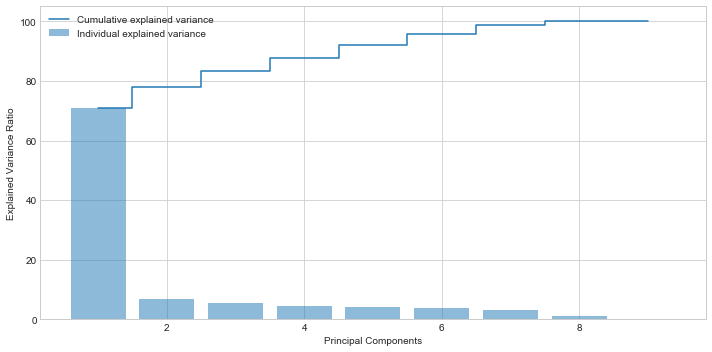

In [29]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [30]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_train_sd)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

principalDf.head(10)

,principal component 1,principal component 2,principal component 3,principal component 4
0,-2.232391,0.551400,0.050779,0.181547
1,-2.232391,0.551400,0.050779,0.181547
2,-1.272868,-0.077627,-0.117006,0.484285
3,2.404669,-0.549214,-1.087367,-1.975887
4,-1.803367,0.717939,0.071909,-0.324223
5,-1.946299,0.438299,-0.501499,0.105293
6,-1.905232,-0.369548,0.187519,0.093129
7,-1.496987,-0.597941,0.088569,-0.165587
8,-1.223768,-0.465513,0.328520,-0.119841
9,2.261949,0.261281,-1.404328,0.167212


In [31]:
print("Variance Ratio",pca.explained_variance_ratio_)
print(pca.n_features_)
print("Components",pca.components_)

Variance Ratio [0.70968025 0.06846402 0.05590635 0.04446095]
9
Components [[ 0.3080252   0.38764432  0.38408368  0.34329176  0.35385148  0.34283902
   0.35964846  0.34261695 -0.        ]
 [-0.86708784  0.05065097 -0.03492785  0.34044443  0.21750646 -0.13553417
   0.09446939  0.23209429  0.        ]
 [ 0.12874274  0.15378852  0.15979196 -0.40480707  0.33325909 -0.66182527
  -0.17373383  0.43716634  0.        ]
 [-0.083247    0.32732796  0.30533619  0.04155825  0.41732466 -0.09137952
  -0.27556496 -0.72974169 -0.        ]]


# Q10 Find correlation between components and features

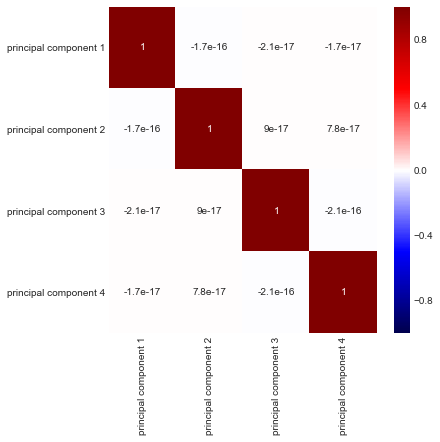

In [32]:
# Check for correlation between components

fig, ax = plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(principalDf.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

In [33]:
# Appending Components back to main cdf file
pcadf = pd.concat([cdf, principalDf], axis = 1)
pcadf.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,principal component 1,principal component 2,principal component 3,principal component 4
0,5,1,1,1,2,1.0,3,1,1,2,-2.232391,0.551400,0.050779,0.181547
1,5,4,4,5,7,10.0,3,2,1,2,-2.232391,0.551400,0.050779,0.181547
2,3,1,1,1,2,2.0,3,1,1,2,-1.272868,-0.077627,-0.117006,0.484285
3,6,8,8,1,3,4.0,3,7,1,2,2.404669,-0.549214,-1.087367,-1.975887
4,4,1,1,3,2,1.0,3,1,1,2,-1.803367,0.717939,0.071909,-0.324223


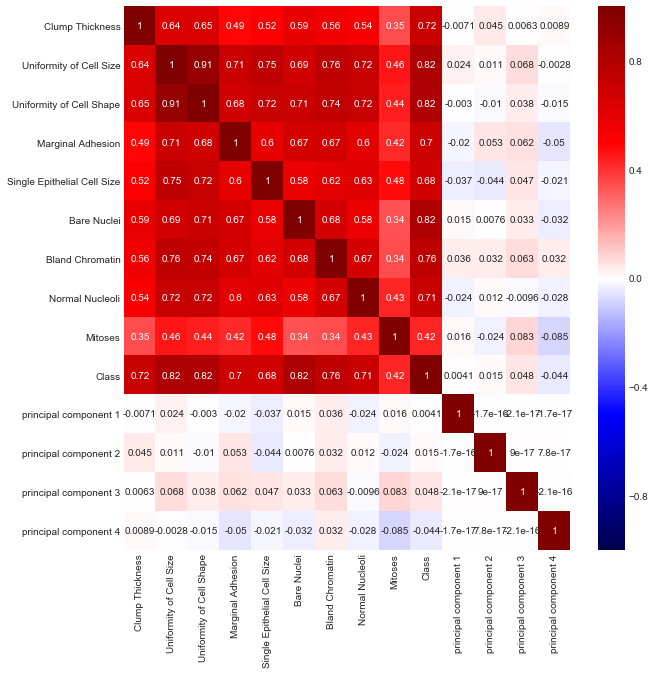

In [34]:
# Correlation between Actual Features and Pricipal Components
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(pcadf.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [35]:
jokes = pd.read_csv('jokes.csv',header=None)
jokes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,Joke40,Joke41,Joke42,Joke43,Joke44,Joke45,Joke46,Joke47,Joke48,Joke49,Joke50,Joke51,Joke52,Joke53,Joke54,Joke55,Joke56,Joke57,Joke58,Joke59,Joke60,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
1,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.5,-4.37,-9.81,-8.5,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.4,-8.4,-8.4,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.1,3.93,4.13,-8.69,-7.14,3.2,8.3,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.3,5.68,-4.81,99,99,99,99,99,99,99,-9.42,99,99,99,-7.72,99,99,99,99,99,99,99,99,2.82,99,99,99,99,99,-5.63,99,99,99
2,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.3,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.5,-0.92,7.14,9.03,-1.8,0.73,7.09,3.4,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.2,-4.9,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.5,-3.2,8.64,-2.14,0.1,9.03,-6.7,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.2,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
3,49,99,99,99,99,9.03,9.27,9.03,9.27,99,99,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99,8.25,99,99,7.48,7.28,7.28,8.93,99,6.17,7.28,99,99,8.98,7.33,99,6.17,9.08,7.33,7.52,9.27,9.27,99,9.27,99,6.17,7.33,9.08,7.28,99,99,7.28,7.33,99,7.23,99,99,99,9.27,6.46,7.28,99,99,7.04,7.28,99,7.28,8.25,99,99,99,99,99,99,8.93,99,99,99,9.08,99,99,99,99,99,99,99,99,99,9.03,99,99,99,9.08,99,99,99,99,99,99
4,48,99,8.35,99,99,1.8,8.16,-2.82,6.21,99,1.84,7.33,6.6,6.31,8.11,-7.23,-6.65,1.17,-6.6,-3.64,-2.09,5.34,99,99,99,99,2.91,3.93,6.75,6.6,99,6.65,-6.12,99,7.57,6.21,6.65,99,-8.3,7.18,2.82,99,1.55,99,99,99,6.84,6.84,-3.98,6.99,3.45,99,6.94,1.55,7.67,99,6.55,99,99,99,99,0,-3.69,99,99,7.82,0.24,99,7.28,-2.33,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,0.63,99,99,-2.33,99,99,99,99,99,0.53,99,99,99,99,99,99


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [36]:
ratings1 = jokes.head(200)
ratings2 = ratings1.drop(0,axis=1)
ratings = ratings2.drop(0,axis=0)  
ratings.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.5,-4.37,-9.81,-8.5,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.4,-8.4,-8.4,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.1,3.93,4.13,-8.69,-7.14,3.2,8.3,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.3,5.68,-4.81,99,99,99,99,99,99,99,-9.42,99,99,99,-7.72,99,99,99,99,99,99,99,99,2.82,99,99,99,99,99,-5.63,99,99,99
2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.3,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.5,-0.92,7.14,9.03,-1.8,0.73,7.09,3.4,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.2,-4.9,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.5,-3.2,8.64,-2.14,0.1,9.03,-6.7,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.2,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
3,99,99,99,99,9.03,9.27,9.03,9.27,99,99,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99,8.25,99,99,7.48,7.28,7.28,8.93,99,6.17,7.28,99,99,8.98,7.33,99,6.17,9.08,7.33,7.52,9.27,9.27,99,9.27,99,6.17,7.33,9.08,7.28,99,99,7.28,7.33,99,7.23,99,99,99,9.27,6.46,7.28,99,99,7.04,7.28,99,7.28,8.25,99,99,99,99,99,99,8.93,99,99,99,9.08,99,99,99,99,99,99,99,99,99,9.03,99,99,99,9.08,99,99,99,99,99,99
4,99,8.35,99,99,1.8,8.16,-2.82,6.21,99,1.84,7.33,6.6,6.31,8.11,-7.23,-6.65,1.17,-6.6,-3.64,-2.09,5.34,99,99,99,99,2.91,3.93,6.75,6.6,99,6.65,-6.12,99,7.57,6.21,6.65,99,-8.3,7.18,2.82,99,1.55,99,99,99,6.84,6.84,-3.98,6.99,3.45,99,6.94,1.55,7.67,99,6.55,99,99,99,99,0,-3.69,99,99,7.82,0.24,99,7.28,-2.33,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,0.63,99,99,-2.33,99,99,99,99,99,0.53,99,99,99,99,99,99
5,8.5,4.61,-4.17,-5.39,1.36,1.6,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.2,6.12,8.3,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.2,-1.26,6.8,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99,99,99,99,99,99,4.13,99,99,99,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.8,1.6


# Q22 Change the column indices from 0 to 99

In [37]:
ratings.columns=np.arange(0,100)
ratings.head()
ratings.shape

(199, 100)

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [38]:
ratings.replace('99','0')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
1,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.5,-4.37,-9.81,-8.5,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.4,-8.4,-8.4,-8.11,-9.13,-9.03,-9.08,-7.14,-6.26,3.79,-0.1,3.93,4.13,-8.69,-7.14,3.2,8.3,-4.56,0.92,-9.13,-9.42,2.82,-8.64,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.3,5.68,-4.81,0,0,0,0,0,0,0,-9.42,0,0,0,-7.72,0,0,0,0,0,0,0,0,2.82,0,0,0,0,0,-5.63,0,0,0
2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.3,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.5,-0.92,7.14,9.03,-1.8,0.73,7.09,3.4,-0.87,7.91,7.82,-3.83,8.64,8.98,-4.32,-3.2,-4.9,-0.92,-1.46,3.64,3.16,9.03,0.97,-1.31,-6.5,-3.2,8.64,-2.14,0.1,9.03,-6.7,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.2,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
3,0,0,0,0,9.03,9.27,9.03,9.27,0,0,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,0,8.25,0,0,7.48,7.28,7.28,8.93,0,6.17,7.28,0,0,8.98,7.33,0,6.17,9.08,7.33,7.52,9.27,9.27,0,9.27,0,6.17,7.33,9.08,7.28,0,0,7.28,7.33,0,7.23,0,0,0,9.27,6.46,7.28,0,0,7.04,7.28,0,7.28,8.25,0,0,0,0,0,0,8.93,0,0,0,9.08,0,0,0,0,0,0,0,0,0,9.03,0,0,0,9.08,0,0,0,0,0,0
4,0,8.35,0,0,1.8,8.16,-2.82,6.21,0,1.84,7.33,6.6,6.31,8.11,-7.23,-6.65,1.17,-6.6,-3.64,-2.09,5.34,0,0,0,0,2.91,3.93,6.75,6.6,0,6.65,-6.12,0,7.57,6.21,6.65,0,-8.3,7.18,2.82,0,1.55,0,0,0,6.84,6.84,-3.98,6.99,3.45,0,6.94,1.55,7.67,0,6.55,0,0,0,0,0,-3.69,0,0,7.82,0.24,0,7.28,-2.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.63,0,0,-2.33,0,0,0,0,0,0.53,0,0,0,0,0,0
5,8.5,4.61,-4.17,-5.39,1.36,1.6,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.2,6.12,8.3,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.2,-1.26,6.8,4.51,2.48,0.34,6.84,0.19,-8.74,5.24,6.31,8.06,1.26,4.51,-0.05,4.42,3.06,8.93,7.82,1.75,8.11,-8.06,-9.17,4.95,3.35,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,0,0,0,0,0,0,4.13,0,0,0,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.8,1.6
6,-6.17,-3.54,0.44,-8.5,-7.09,-4.32,-8.69,-0.87,-6.65,-1.8,-6.8,-5.73,-5,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.6,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,-7.04,-8.83,-7.91,1.07,-1.89,-6.36,-4.22,-9.27,-9.81,-7.82,-0.63,-6.31,-7.48,-6.07,-3.45,-3.2,0.53,-9.27,-9.56,-5.49,-1.12,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5,-4.42,-7.28,-6.5,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
7,0,0,0,0,8.59,-9.85,7.72,8.79,0,0,4.27,7.62,-6.26,2.96,6.07,-3.5,-2.09,6.17,5.15,4.42,5.63,2.43,0,0,4.13,7.09,7.33,7.18,0.92,0,5.15,5.87,0,0,7.96,3.79,0,1.55,0,3.11,6.26,0,0,0,6.99,3.2,0,7.33,4.71,3.54,0,2.28,8.5,9.22,0,8.16,0,0,0,0,-1.5,5.78,0,0,8.93,8.5,0,2.43,7.48,0,0,5.97,6.36,0,0,0,0,0,0,0,0,0,3.83,0,0,0,0,0,0,0,0,0,0,0,0,2.33,0,0,0,0
8,6.84,3.16,9.17,-6.21,-8.16,-1.7,9.27,1.41,-5.19,-4.42,8.2,-7.86,-6.94,-7.96,0.29,-9.9,-7.09,-7.18,1.02,-0.29,-4.71,-7.43,1.12,-8.25,3.79,0.1,3.45,-3.45,7.57,-4.17,-0.44,9.27,5.83,-3.4,-5.44,1.6,-7.14,3.01,-6.07,5.68,-6.46,-4.42,-8.98,0.53,-1.26,-4.42,-8.93,8.93,-0.1,7.43,-4.51,-7.38,4.17,-9.03,-2.14,1.31,-5.68,-9.08,-6.21,2.48,-3.2,-6.12,-2.91,-9.22,-2.62,-7.33,-3.25,-4.22,-9.81,-2.09,-9.9,-3.79,0.49,-7.86,-9.85,1.8,-4.17,-2.38,-9.13,-8.88,3.54,-4.56,-5.44,-5.97,-9.9,-0.34,-4.13,-0.1,-0.24,-7.96,7.23,-1.12,-0.1,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0
9,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [39]:
sc = StandardScaler()
ratings_diff =  sc.fit_transform(ratings)
ratings_diff = pd.DataFrame(ratings_diff)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.835222,-0.266089,-0.946166,-1.069664,-1.376572,-0.885863,-1.779576,0.878175,-1.034391,-0.594973,-0.735306,-0.713715,-1.107927,-0.294839,-1.078458,-0.932736,-1.483617,-1.841514,-2.119920,-1.780433,-1.054166,-0.439684,-0.612569,-1.027549,-0.666093,-0.284756,0.528723,-0.148346,0.459411,-0.815866,-0.172432,-0.731407,-0.902109,-0.255210,0.079723,-0.012314,-0.897116,-0.636379,-0.678629,-0.712666,-0.758467,-0.737476,-0.832832,-0.895492,-0.604496,-0.594829,-0.288659,-0.259835,0.006942,0.024043,-0.803206,-0.739788,-0.104979,0.160448,-0.687265,-0.237226,-0.965890,-1.014063,-0.542148,-0.812269,0.090866,-0.022926,-0.681981,-0.840692,-0.155649,-0.437866,-0.922558,1.271049,0.124525,-0.713207,0.726333,0.695274,0.687186,0.687121,0.671213,0.687014,0.679234,-1.687350,0.694763,0.686743,0.726482,-1.583737,0.718931,0.711012,0.743132,0.751288,0.751570,0.735376,0.695273,0.775798,-1.392583,0.743105,0.776278,0.775729,0.743005,0.743324,-1.388265,0.710453,0.792624,0.710749
1,-0.571420,-0.501794,-0.607418,-0.820115,-0.426169,-0.911770,-0.158485,-1.079072,-0.670422,-0.209919,-0.336337,-0.321531,1.083961,-0.322372,1.188515,0.367029,1.229947,0.018344,0.622979,-0.069373,-0.248664,-0.247501,-0.289735,-0.649039,-0.418271,-0.039244,0.145793,-0.239134,-0.427068,-0.507096,0.131293,-0.436117,-0.557072,-0.221754,-0.567531,-0.355065,-0.556831,-0.223355,-0.459331,-0.288828,-0.390448,-0.503187,-0.448782,-0.524746,-0.517481,-0.473877,-0.564641,-0.306955,-0.504450,-0.101327,-0.537715,-0.354791,-0.380671,-0.356142,-0.734117,-0.524209,-0.607574,-0.872995,-0.603601,-0.418156,-0.651041,-0.672022,-0.737088,-0.552722,-0.082388,-0.668967,-0.547549,-0.249222,-0.262670,-0.427039,-1.464354,-1.448465,-1.292958,-1.256627,-1.314262,-1.358461,-1.312906,-1.283001,-1.263350,-1.308087,-1.315050,-1.313487,-1.335789,-1.295840,-1.173948,-1.244349,-1.362618,-1.327062,-1.430620,-1.251808,-1.392583,-1.454772,-1.355863,-1.152252,-1.378611,-1.410704,-1.205719,-1.398409,-1.352833,-1.411015
2,1.532795,2.075642,1.351485,1.064550,1.683576,-0.488994,1.576368,1.927802,1.166133,2.262910,-0.321163,-0.348798,2.019292,-0.356383,-0.920118,-0.807720,-1.580129,1.996353,1.818173,1.958549,0.255562,2.184674,-0.292273,1.142401,2.449787,-0.042670,0.462234,0.053302,0.440787,1.463080,0.108305,0.330142,1.397003,2.265864,0.451067,0.180991,1.366637,-0.126400,-0.169554,-0.303900,-0.397379,0.075905,-0.435089,1.323241,-0.098143,3.565764,-0.213073,0.167113,0.495563,0.829995,1.609511,1.787338,0.399427,0.108305,1.813756,0.202304,1.214455,1.086842,1.630821,-0.412803,-0.012487,0.322198,1.981274,1.463714,0.089716,0.370519,1.351908,1.055077,0.327605,1.696123,0.726333,0.695274,0.687186,0.687121,0.671213,-1.298501,0.679234,0.695233,0.694763,-1.288754,0.726482,0.710701,0.718931,0.711012,0.743132,0.751288,0.751570,0.735376,0.695273,-1.077725,0.703114,0.743105,0.776278,-1.126444,0.743005,0.743324,0.809649,0.710453,0.792624,0.710749
3,1.532795,-0.277511,1.351485,1.064550,0.346726,-0.513784,-0.529985,1.298026,1.166133,-0.413188,-0.321163,-0.373516,1.441087,-0.304017,-1.088113,-0.760095,0.446627,-1.187610,-0.824604,-0.243648,0.102957,2.184674,2.010963,1.142401,2.449787,-0.216621,0.049753,0.029122,0.223824,1.463080,0.141742,-0.922037,1.397003,-0.262122,0.189331,0.125761,1.366637,-0.632879,-0.224889,-0.421098,1.716016,-0.265362,1.515155,1.323241,2.670598,-0.077028,-0.191795,-0.482791,0.297268,-0.149940,1.609511,-0.404552,-0.308967,0.126582,1.813756,0.154938,1.214455,1.086842,1.630821,1.588539,-0.325941,-0.703822,1.981274,1.463714,0.135068,-0.288165,1.351908,1.055077,-0.508421,1.696123,0.726333,0.695274,0.687186,0.687121,0.671213,0.687014,0.679234,0.695233,0.694763,0.686743,0.726482,0.710701,0.718931,0.711012,-1.351771,0.751288,0.751570,-1.457331,

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [40]:
ratings_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 100 columns):
0     199 non-null float64
1     199 non-null float64
2     199 non-null float64
3     199 non-null float64
4     199 non-null float64
5     199 non-null float64
6     199 non-null float64
7     199 non-null float64
8     199 non-null float64
9     199 non-null float64
10    199 non-null float64
11    199 non-null float64
12    199 non-null float64
13    199 non-null float64
14    199 non-null float64
15    199 non-null float64
16    199 non-null float64
17    199 non-null float64
18    199 non-null float64
19    199 non-null float64
20    199 non-null float64
21    199 non-null float64
22    199 non-null float64
23    199 non-null float64
24    199 non-null float64
25    199 non-null float64
26    199 non-null float64
27    199 non-null float64
28    199 non-null float64
29    199 non-null float64
30    199 non-null float64
31    199 non-null float64
32    199 non-null float64
33 

In [41]:
ratings_mean = pd.DataFrame(ratings_diff.mean())
ratings_mean.head()

,0
0,-4.574788e-17
1,9.372737e-17
2,7.810614e-17
3,-2.008444e-17
4,3.905307e-17


In [42]:
# Top 10 Jokes
ratings_mean.sort_values(0, axis = 1, ascending = False).head(10)

,0
0,-4.574788e-17
1,9.372737e-17
2,7.810614e-17
3,-2.008444e-17
4,3.905307e-17
5,8.926416e-18
6,4.463208e-18
7,6.973763e-18
8,-8.591676e-17
9,-6.025331e-17
